In [8]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
df = pd.read_csv('F:/Simplilearn/DataSet/ML/Ecommerce_Customers.csv')

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


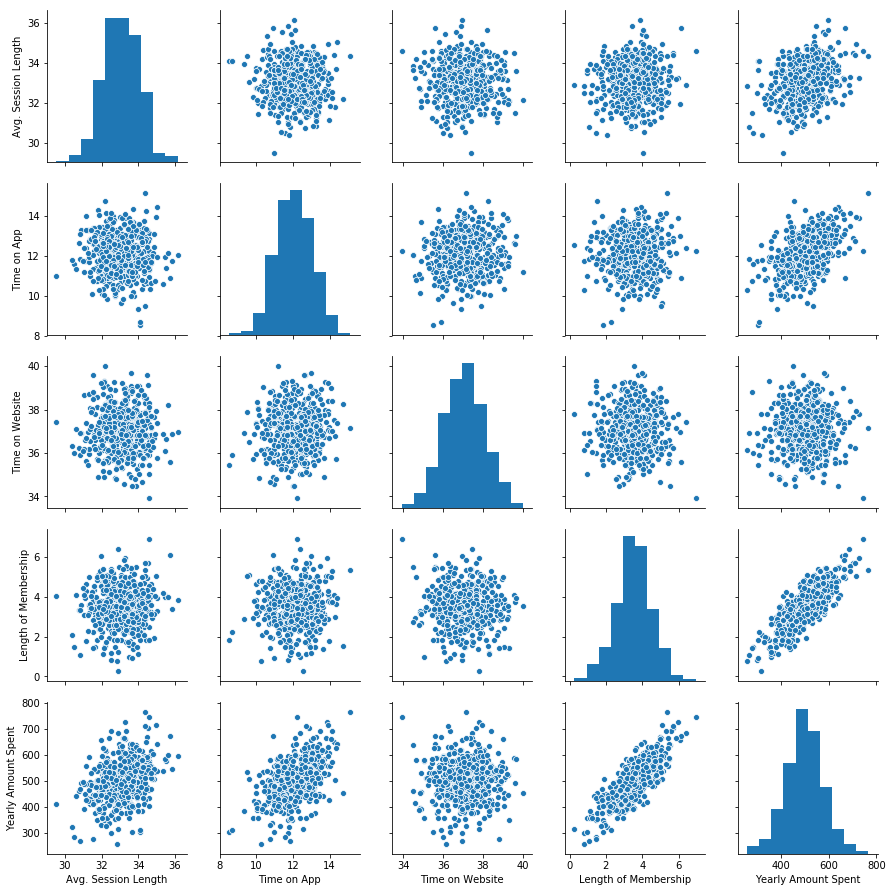

In [4]:
sns.pairplot(df)

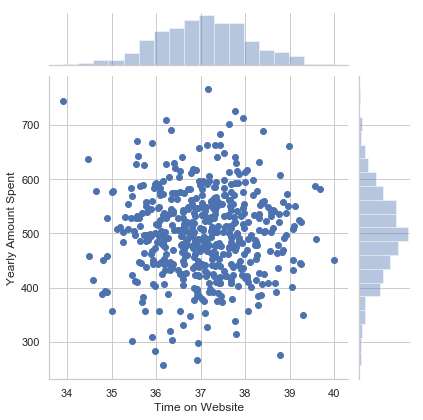

In [10]:
sns.set_style('whitegrid')
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=df)

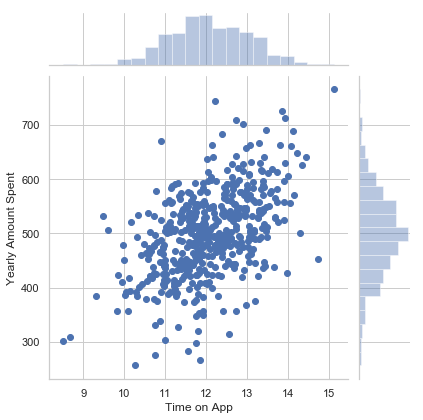

In [11]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=df);

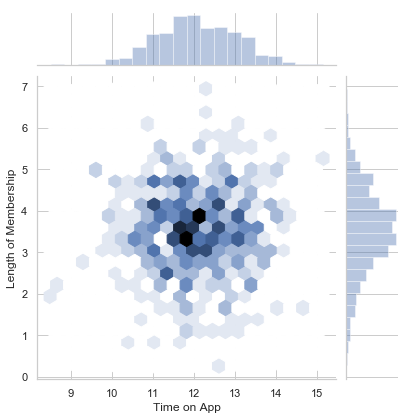

In [12]:
sns.jointplot(x='Time on App', y='Length of Membership' ,data=df, kind='hex')

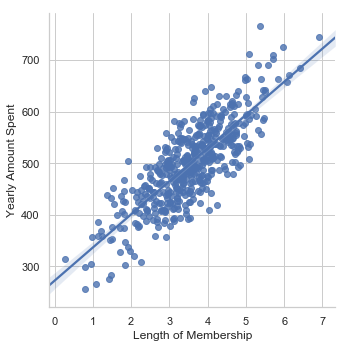

In [13]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=df)

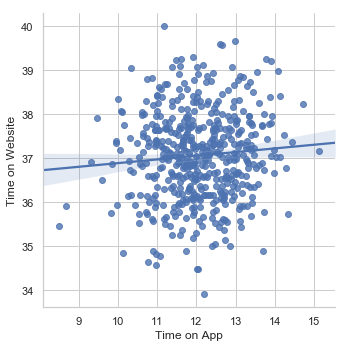

In [14]:
sns.lmplot(x='Time on App',y='Time on Website',data=df)

In [15]:
y=df['Yearly Amount Spent']

In [16]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [17]:
X = df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [20]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
print("Coefficients", lm.coef_)

Coefficients [25.72425621 38.59713548  0.45914788 61.67473243]


In [22]:
predicted = lm.predict(X_test)

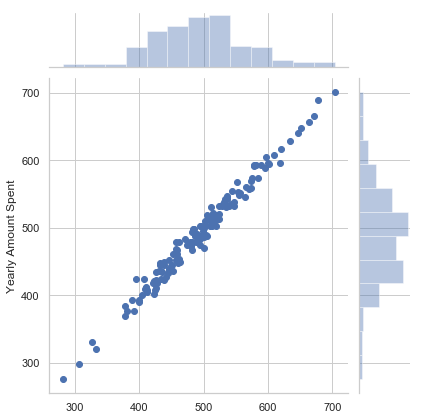

In [23]:
sns.jointplot(predicted, y_test)

In [26]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np 

print('MAE :', mean_absolute_error(y_test,predicted))
print('MSE :', mean_squared_error(y_test,predicted))
print('RMSE :', np.sqrt(mean_squared_error(y_test,predicted)))

MAE : 8.42609164143211
MSE : 103.91554136503348
RMSE : 10.193897260863162


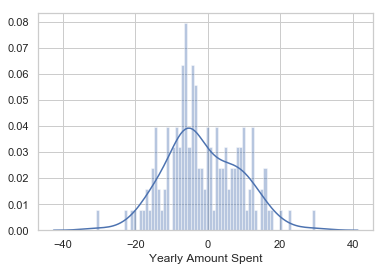

In [27]:
sns.distplot((y_test-predicted),bins=72)

In [28]:
coef = pd.DataFrame(lm.coef_,X.columns)
coef.columns=['Coefficients']
coef.head()

,Coefficients
Avg. Session Length,25.724256
Time on App,38.597135
Time on Website,0.459148
Length of Membership,61.674732


## Conclusion is when all other Variables are fixed the targetted variable is Coefficients times 
## Effective on yearly spent variable
